In [25]:
# Install dependencies
!apt-get install -y tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [26]:
# Import libraries

import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

In [27]:
# Preprocess image (grayscale, denoise, enhance, threshold)

def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 3)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(blur)
    _, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary

In [28]:
# Perform Tesseract OCR and draw bounding boxes

def draw_tesseract_boxes(original_img, processed_img, psm=6):
    img_copy = original_img.copy()
    config = f"--oem 3 --psm {psm}"

    # OCR with detailed data
    boxes = pytesseract.image_to_data(processed_img, config=config, output_type=pytesseract.Output.DICT)
    extracted_text = ""

    for i in range(len(boxes['text'])):
        text = boxes['text'][i].strip()
        conf = int(boxes['conf'][i])
        if conf > 60 and text != "":
            x, y, w, h = boxes['left'][i], boxes['top'][i], boxes['width'][i], boxes['height'][i]
            extracted_text += text + " "
            cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    return img_copy, extracted_text.strip()

In [55]:
img_path = "/content/drive/MyDrive/Demo/hello.jpg"
image_loaded = cv2.imread(img_path)


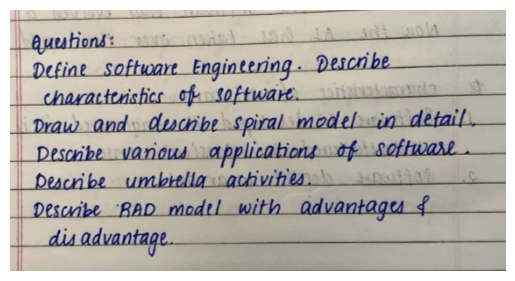

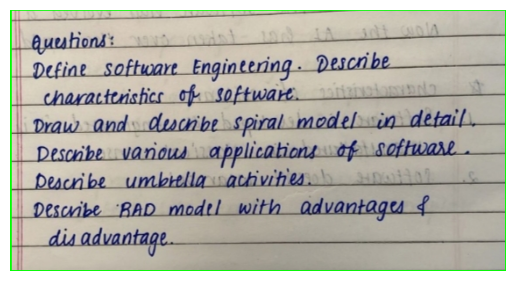

[eT aeenrarente

| Define software Engineering . Desceibe ae

lo ai . ine ei

a 700 modihgeiaacellaaea gle
ee  LLDLDLhLhl,LhlUmL


In [56]:
if image_loaded is None:
    print(f"Error: Unable to read the image file: {img_path}")
else:
    plt.imshow(cv2.cvtColor(image_loaded, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    preprocessed_image = process_image(image_loaded)
    text_boxes = text_regions(preprocessed_image)
    image_with_boxes = mark_text_regions(image_loaded.copy(), text_boxes)

    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    extracted_text = extract_text(image_loaded, text_boxes)
    print(extracted_text)